# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
import matplotlib.pyplot as plt

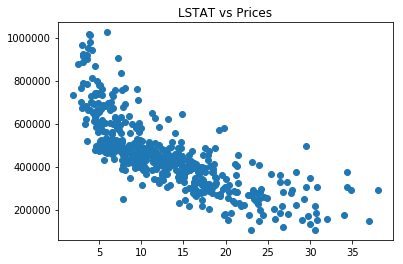

In [3]:
plt.scatter(features['LSTAT'],prices)
plt.title('LSTAT vs Prices')
plt.show()

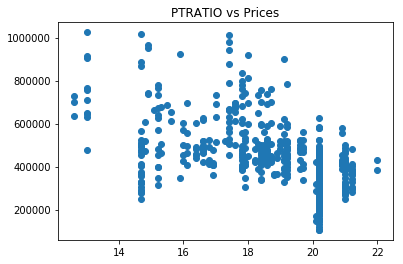

In [4]:
plt.scatter(features['PTRATIO'],prices)
plt.title('PTRATIO vs Prices')
plt.show()

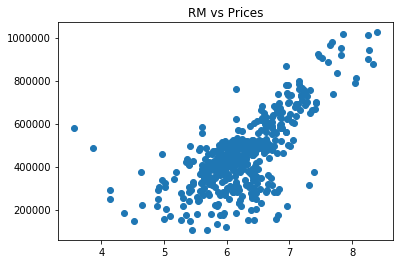

In [5]:
plt.scatter(features['RM'],prices)
plt.title('RM vs Prices')
plt.show()

In [6]:
data.head()
# print type(prices)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [7]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# std_price = prices.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: 
    1. Increase in RM normally leads to an increase in MEDV.'RM' is the average number of rooms among homes in the neighborhood. A high value for RM typically indicates that the average size of the hosues in the neighborhood is large. Larger houses are normally considered luxury and tend to be less affordable(higher prices). It can also suggest that the poverty rate (LSTATS) is low, which also contribute to higher house price. 
    2. Increase in LSTAT normally leads to a decrease in MEDV. LSTAT' is the percentage of homeowners in the neighborhood considered "lower classs." People classified as working poor tend to buy houses in neighborhoods where houses are more affordable. This could mean the average size of the house in those neighborhoods is small and access to public facilities is limited. Those factors also contribute to the the lower MEDV given high LSTAT.
    3. Increase in PTRATIO may lead to decrease in MEDV. A high PTRATIO normally means the access to teaching resource is very limited. This situation normally occurs in areas where houses prices are low, since wealthy individuals who can afford to buy expensive houses would also want to bring the best education forces to their neighborhood. To be honest, I don't really think there is a relationship between PTRATIO and MEDV. I also made a scatter plot to satisfy my curiosity, and it seems like the graph does not suggest a clear relationship between RTRATIO and MEDV.
**

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [8]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [9]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer: I would consider the model has successfully predicted captured the variation of the target variable, because, as R^2 value indicates, 92.3% of the variation in the dependent variable is predictable from independent variable. R^2 measures the percentage of variation in the response variable explained by the linear model we constructed, and it takes a range of value from 0 to 1, with 1 indicating all variation of response variable is explained and 0 indicating no variation of response variable is explained. Our model had a R^2 of 0.923, which tells us that our model is doing a close to perfect job in explaining the variation in the true values set with the predictions**

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 25, shuffle = True)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: Splitting a dataset into some ratio of training and testing subsets can help us identify overfitting and underfitting. We can use methods like the learning curve to see how a model's training errors and testing errors perform over a range of ratios of training and testing subsets. Underfitting models tend to have testing errors and training errors converge to a high number, while overfitting models have testing errors and training errors not converging to each other**

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

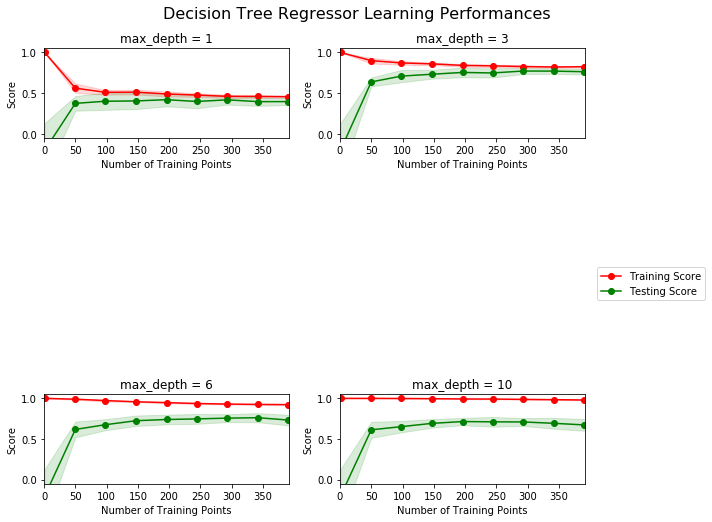

In [11]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: The graph I picked was the fourth model. The trainning curve does not change by much as more training points are added, while the testing curve orginally increases by a lot, but gradually flattens as the number of training points increase. This is an classic example of overfitting, where the training scores are always perfect but the testing scores do not show signs of converging to the testing scores as the number of training points increases. In this case, adding more training points would probably not be a good idea, as it increases the model complexity but fail to increase the percentage of variation accounted by the model**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

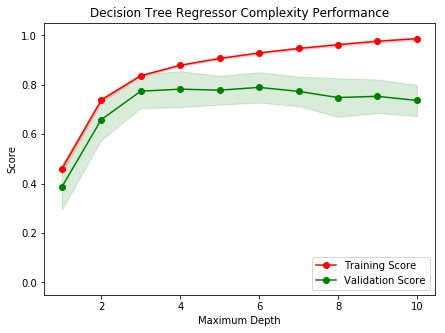

In [12]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: When the model is trained with max depth of 1, the model is underfitting and suffers from high bias. The validation and training scores show that the model is not doing well on the testing set and training set. When the max depth is increased to 10, the model is overfitting and suffers from high variance. The training and validation scores completely diverge at 10. The model does extremely well on the training set, showing signs of fitting the training set exclusively. At the same time, the model's performance on the testing set start to decrease.**

Solving problems for high bias model:
    Increase the model complexity (higher degree models)
Solving problems for high variance model:
    Increase model flexibility:
    Methods:
    - L1,L2 regularization
    - Elastic net
    

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: Personally, I prefer the model with max depth of 3. First of all, the model achieves the best testing score. The model's validation scores don't show improvements at all with increasing max depth after 3. Thus, it provides the best solution to the tradeoff between bias, variance, and model complexity. We want the model to be able to accurately predict parameters on the testing set, but also don't want to increase the model complexity too much just to increase the overall fit on the training set, which afterall is just a small part of the larger data**

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: Training a model with data usually means tuning the our model parameters according to the data to the best ones that will help us to predict from new data. However, a model is also defined by other "parameters" called hyperparameters. Hyperparameters, specific to each classifier, are usually previously defined to specify the methods to search for the best model parameters. An example would be the kernal in SVM classifier. Although the optimal parameters can be found using our data, the best hyperparameters can never be known. The grid search technique is a method used to find the select the best combination of hyperparameters for a model from a range of combinations of hyperparameters. The do grid search, we need three inputs: method of classfication, the grid, and a scoring method. We first choose a performance metric of focus. This should determine our scoring method for each combination of hyperparameters. For instance, you can choose F1 score or F-beta score if you prefer one side of the bias-variance tradeoff to the other. The grid is a table that shows scores for the models trained with each combinations of hyperparameters we are concerned with. Each trained model are tested on a cross validation set to obtain the score based on the scoring method of our choice. Then, we can choose the model with the best score, and its specific hyperparameter combinations is considered the close-to-optimal hyperparameters. One example would be finding the best combinations of Gamma and Kernel for a SVM classfier. We want Gamma to be from 1 to 10, and Kernel to be either polynomial or linear. We can choose the F1 scoring method, and the grid would show the F1 scores for models trained with each Gamma-Kernal combination: "Poly, 1", ... "Linear, 2"...etc. Then we can pick the Gamma-Kernal combination that gives us the best F1 score to be our hyperparameters.**

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: K-fold cross-validation is training technique used to evaluate whether a given algorithm will properly train or not. If we have a traning set, we divide the training set to K equally sized folds. We use the first fold for validation, and train the model with the K-1 folds left to obtain a score for the training. We repeat this process with each fold being the validation* set and obtain K scores. We then take the average of the K scores to get an "unbiased estimate of model generalization on unseen data". The purpose is to evaluate the model in an unbiased way, as simple train-test split method has the risk to generalize the model evaluation metric for a specific test-traing split, resulting in the optimal model that only fits the specific data arrangement.
    When applied to grid search, K-fold can be really helpful to get rid of the bias. For each hyperparameter combination, we apply K-fold cross validation to obtain an unbiased evaluation metric. Then we compare the unbiased metrics to get the best hyperparameter combination. This eliminates the risk of getting optimal hyper-parameter combination that is only a good choice when it comes to a particulatlly arranged traing data but fail to perform well given more datasets.

Here are a few additional points on k-fold to always keep in mind:

There is a huge difference between testing and cross-validation.

K-fold is a cross-validation technique and not a testing technique.

Suppose you use all your data for training. What do you think will happen in this scenario?

Your model might overfit or underfit or it might be a good fit as well. If your model is underfitting you will know that from your train scores (which will be low). But if your model is overfitting, your train scores will be high. By first look it would seem you have done a great job in training, but most probably you have not. It is only after you test your model with the test set that you will know the real performance of your model. Using part of train set to test will always give good results if you are getting good train score (since your model is biased towards that data)

That’s why you always need a test set. But while training you cannot use your test set performance to improve your model, because that would make your model biased towards the test set. Hence you need to do cross-validation.

Using normal cross-validation also has its disadvantages, since you use up a part of your training data. Hence, here k-fold comes to the rescue

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [13]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 25)
    # Question: Does Random State matter here?

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor,params,scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [14]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: The optimal model has a max_depth of 5, which is quite different from my initial guess 3 in Question 6. I think the outcome makes sense in that the model better fits the training set without really sacrificing the overall fit on the cross validation set. On the other hand, the model with max_depth 5 also has lower uncertainty surrounding the model scores, which signals better chance of capturing the variation of the models.**

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [15]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $431,287.50
Predicted selling price for Client 2's home: $175,700.00
Predicted selling price for Client 3's home: $913,500.00


**Answer: I would recommende Client 1 to sell his/her home at 431,287,50 dollars, Client 2 to sell his/her home at 175,700.00 dollars, and Client 3 to sell his/her home at 913,500.00 dollars. These prices are reasonable. Client 2's house is the smallest and is located in a neighborhood with relatively high poverty rate and student-to-teacher ratio. Therefore Client 2's house is selling close to the minimum price for a house in Boston. On the other hand, Client 2's house is the largest, having 8 rooms in total, and locates in a neighborhood with the lowest proverty rate. The house also has the access to the best education, where student to teacher ratio is only 12 to 1. Thus Client 3's house is priced at the highest percentile of all Boston houses. Client 1's house is somewhere in the middle, reflectinng its average quality in all three features.**

**Advantages to a tree model:

    Linear regression and logistic regression models fail in situations where the relationship between features and outcome is nonlinear or where features interact with each other. Time to shine for the decision tree! The tree structure is ideal for capturing interactions between features in the data. The data ends up in distinct groups that are often easier to understand than points on a multi-dimensional hyperplane as in linear regression. The interpretation is arguably pretty simple.
    
**

**Disadvantages: Not good with linear models

- Lack of Smoothness
- Unstable: Change in data changes the tree substantially.

**

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [16]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: The model constructed have little capability to predict a house price in a real-world setting given the complexity in such setting. First of all, data collected from 1978 is very likely not relevant for today's house prices anymore. First of all, the inflation in the last 40 years had turned house prices to a much higher level. The population growth, overall reduction in proverty rate, and the improve education system may render the predictive quality of many parameters void nowadays. On the other hand,  hundreds of factors may contribute to the prices of a particular house. The three factors used in the model may have little predictive power but just happen to be correlated to some real determinants of the prices of the houses. Two of the three charateristics evaluated in the model are all related to the overall neighborhood, which is just a part of the determinants of the house price. Imagine a very simple and silly example, a house that locates in a medium quality neighborhood, but has the best access to public transportation, a big lot, and a swimming pool, would be priced much higher than a house located in high quality neighborhood but just happens to have unexpected blackouts once or twice in a week. The model constructed based on data in Boston should not be applied to a rural city, as they are irrelevant. Last but not the least, as shown in the above 10 trails, the predicted prices fluctuate in a wide rage. In the real world, a real-estate agency can not provide its clients with a large price range, hoping its client would pick one from the range. The model must be have high predictive quality to be able to be useful.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.